In [14]:
import cv2
import numpy as np
from glob import glob
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFilter, ImageFont


In [33]:
def overlay_image_alpha(img, img_overlay, x, y, alpha_mask):
    """Overlay `img_overlay` onto `img` at (x, y) and blend using `alpha_mask`.

    `alpha_mask` must have same HxW as `img_overlay` and values in range [0, 1].
    """
    # Image ranges
    y1, y2 = max(0, y), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x), min(img.shape[1], x + img_overlay.shape[1])

    # Overlay ranges
    y1o, y2o = max(0, -y), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x), min(img_overlay.shape[1], img.shape[1] - x)

    # Exit if nothing to do
    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return

    # Blend overlay within the determined ranges
    img_crop = img[y1:y2, x1:x2]
    img_overlay_crop = img_overlay[y1o:y2o, x1o:x2o]
    # alpha = alpha_mask[y1o:y2o, x1o:x2o, np.newaxis]
    # alpha_inv = 1.0 - alpha

    img_crop[:] = img_overlay_crop + img_crop

In [8]:
video_files = glob('../APAS/frames/P040_balloon1_side/*.jpg')

In [9]:
video_files

['../APAS/frames/P040_balloon1_side\\img_00001.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00002.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00003.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00004.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00005.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00006.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00007.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00008.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00009.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00010.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00011.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00012.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00013.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00014.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00015.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00016.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00017.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00018.jpg',
 '../APAS/frames/P040_balloon1_side\\img_00019

In [36]:


# Prepare inputs
x, y = 50, 0
img = np.array(Image.open("../APAS/frames/P040_balloon1_side\\img_00063.jpg"))
img_overlay_rgba = np.array(Image.open("results/segmentation.png").resize((375, 57)))

# Perform blending
alpha_mask = img_overlay_rgba[:, :, 2] / 255.0
img_result = img[:, :, :3].copy()
img_overlay = img_overlay_rgba[:, :, :3]
overlay_image_alpha(img_result, img_overlay, x, y, 0)

# Save result
# Image.fromarray(img_result).save("img_result.jpg")

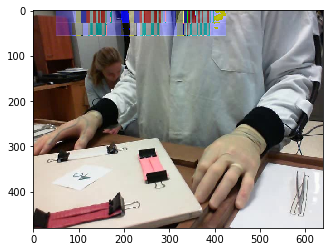

In [37]:

plt.imshow(img_result, interpolation='nearest')
plt.show()

In [13]:
img.shape

(480, 640, 3)

In [15]:
img_overlay_rgba.shape

(227, 1500, 3)

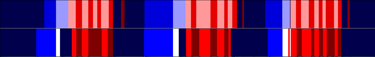

In [18]:
Image.open("results/segmentation.png").resize((375, 57))

In [80]:
# font = ImageFont.truetype("sans-serif.ttf", 16)

OSError: cannot open resource

In [6]:
gesture_to_description = {"G0": "no gesture",
                          "G1": "needle passing",
                          "G2": "pull the suture",
                          "G3": "instrument tie",
                          "G4": "lay the knot",
                          "G5": "cut the suture"}

gesture_to_color = {"G0": "#00004c",  # (0, 0, 76)
                    "G1": "#0000db",  # (0, 0, 219)
                    "G2": "#9999ff",  # (153, 153, 255)
                    "G3": "#ff9999",  # (255, 153, 153)
                    "G4": "#e50000",  # (229, 0, 0)
                    "G5": "#7f0000"}  # (127, 0, 0)


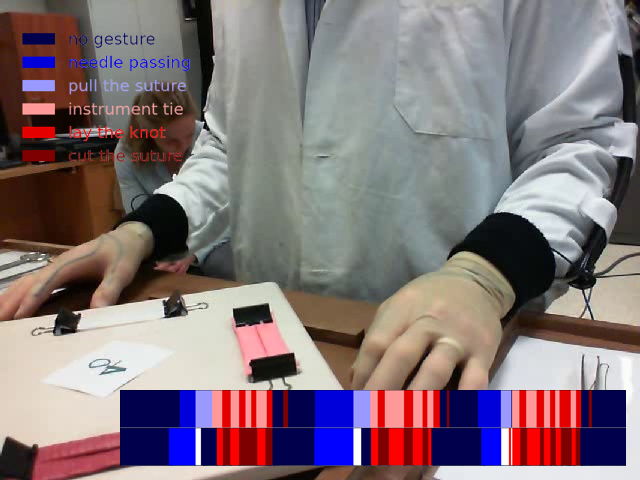

In [91]:
im1 = Image.open("../APAS/frames/P040_balloon1_side\\img_00063.jpg")
im2 = Image.open("results/segmentation.png").resize((int(375 * 1.35), int(57 * 1.35)))
im3 = Image.open("results/gestures_legend.png").resize((int(218 * 0.8), int(172 * 0.8)))

back_im = im1.copy()
back_im.paste(im2, (120, 390))
back_im.paste(im3, (20, 30), im3)

# back_im.tex
# back_im.save('data/dst/rocket_pillow_paste_pos.jpg', quality=95)
back_im

In [60]:
def is_same(rgb1, rgb2):
    r1, g1, b1 = rgb1
    r2, g2, b2 = rgb2
    return np.linalg.norm((r1 - r2, g1 - g2, b1 - b2)) <= 10


In [118]:
def segment_image(img_path, current_frame, last_frame):
    img1 = Image.open(img_path)
    img2_original = Image.open("results/segmentation.png")
    img2 = img2_original.resize((int(375 * 1.35), int(57 * 1.35))).crop(
        (0, 0, 506 * (current_frame / last_frame), 76))
    print(img2_original.size)
    img2_original_cropped = img2_original.crop((0, 0, img2_original.size[0] * (current_frame / last_frame), img2_original.size[1]))
    # img2_original_cropped.show()
    gt = img2_original_cropped.getpixel((img2_original_cropped.size[0] - 1, img2_original_cropped.size[1] // 4))
    pred = img2_original_cropped.getpixel((img2_original_cropped.size[0] - 1, 3 * img2_original_cropped.size[1] // 4))
    print(gt)
    print(pred)
    img2.putpixel((img2.size[0] - 1, img2.size[1] // 4), (255, 255, 255))
    img2.putpixel((img2.size[0] - 1, 3 * img2.size[1] // 4), (0, 255, 0))

    # im2.putpixel((im2.size[0]-1, im2.size[1]//4), (255, 255, 255))
    # im2.putpixel((im2.size[0]-1, im2.size[1]//4), (255, 255, 255))
    # im2.putpixel((im2.size[0]-1, 12), (255, 255, 255))
    # im2.putpixel((im2.size[0]-1, 13), (255, 255, 255))
    # im2.putpixel((im2.size[0]-1, 14), (255, 255, 255))
    # im2.putpixel((im2.size[0]-1, 15), (255, 255, 255))
    # print(im2.getpixel((5, )))
    # im2.

    back_im = img1.copy()
    back_im.paste(img2, (120, 390))
    # back_im.paste(im3, (20, 30), im3)
    draw = ImageDraw.Draw(back_im, 'RGBA')
    # font = ImageFont.truetype(<font-file>, <font-size>)
    # font = ImageFont.truetype("sans-serif.ttf", 16)
    # draw.text((x, y),"Sample Text",(r,g,b))
    draw.text((10, 400), "Truth", font=ImageFont.truetype('david', 25), fill='white')
    draw.text((10, 435), "Predicted", font=ImageFont.truetype('david', 25),
              fill='green' if is_same(gt, pred) else 'red')

    x1_base, y1_base, x2_base, y2_base = (23, 25, 65, 40)

    draw.rectangle((x1_base, y1_base, x2_base, y2_base), fill=gesture_to_color['G0'])
    draw.rectangle((x1_base, y1_base + 30, x2_base, y2_base + 30), fill=gesture_to_color['G1'])
    draw.rectangle((x1_base, y1_base + 30 * 2, x2_base, y2_base + 30 * 2), fill=gesture_to_color['G2'])
    draw.rectangle((x1_base, y1_base + 30 * 3, x2_base, y2_base + 30 * 3), fill=gesture_to_color['G3'])
    draw.rectangle((x1_base, y1_base + 30 * 4, x2_base, y2_base + 30 * 4), fill=gesture_to_color['G4'])
    draw.rectangle((x1_base, y1_base + 30 * 5, x2_base, y2_base + 30 * 5), fill=gesture_to_color['G5'])

    # draw.rectangle((10, 10, 200, 200), fill=(255, 255, 255, 100))
    draw.text((75, 25), gesture_to_description['G0'], font=ImageFont.truetype('david', 20), fill=gesture_to_color['G0'])
    draw.text((75, 25 + 30 * 1), gesture_to_description['G1'], font=ImageFont.truetype('david', 20),
              fill=gesture_to_color['G1'])
    draw.text((75, 25 + 30 * 2), gesture_to_description['G2'], font=ImageFont.truetype('david', 20),
              fill=gesture_to_color['G2'])
    draw.text((75, 25 + 30 * 3), gesture_to_description['G3'], font=ImageFont.truetype('david', 20),
              fill=gesture_to_color['G3'])
    draw.text((75, 25 + 30 * 4), gesture_to_description['G4'], font=ImageFont.truetype('david', 20),
              fill=gesture_to_color['G4'])
    draw.text((75, 25 + 30 * 5), gesture_to_description['G5'], font=ImageFont.truetype('david', 20),
              fill=gesture_to_color['G5'])

    return back_im


segment_image('../APAS/frames/P040_balloon1_side\\img_00063.jpg', 7, 50)

(1500, 227)


(1500, 227)
(153, 153, 255)
(153, 153, 255)


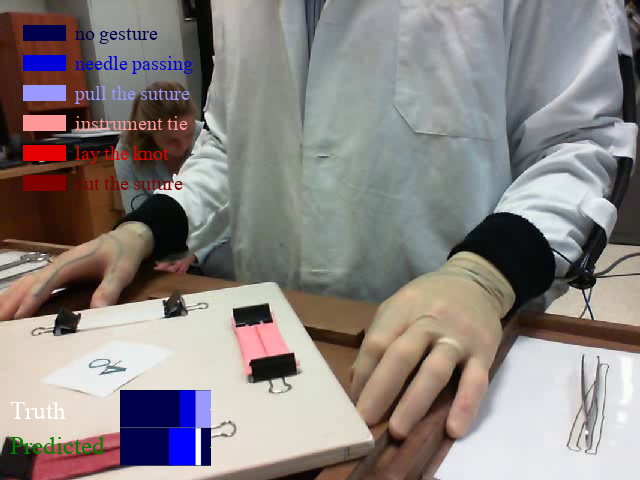

In [108]:
segment_image('../APAS/frames/P040_balloon1_side\\img_00063.jpg', 9, 50)

In [16]:
images = []
for i in range(1, 64):
    f_path = f'../APAS/frames/P040_balloon1_side\\img_{i:05d}.jpg'
    seg = segment_image(f_path, i, 63)
    images.append(seg)

In [19]:
# import cv2
# from glob import glob

FPS = 30


def write_video(video_name, images, slide_time=5):
    # fourcc = cv2.VideoWriter.fourcc(*'MJPG')
    # out = cv2.VideoWriter(file_name, fourcc, FPS, (640, 480))
    video = cv2.VideoWriter(video_name, 0, FPS, (640, 480))
    # x=0
    for image in images:
        cv_img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
        video.write(cv_img)
    cv2.destroyAllWindows()
    video.release()
    # cv2.imshow('image',cv_img)
    # cv2.waitKey(0)

    # for _ in range(slide_time * FPS):
    #     # cv_img = cv2.resize(image)
    #     # out.write(cv_img)
    #     x+=1
    #     print(x)

    # out.release()


In [269]:
# cv2.imshow('img', cv2.cvtColor(np.array(images[0]), cv2.COLOR_RGB2BGR))
# cv2.waitKey(0)

-1

In [81]:
aa = Image.open("results/segmentation.png")

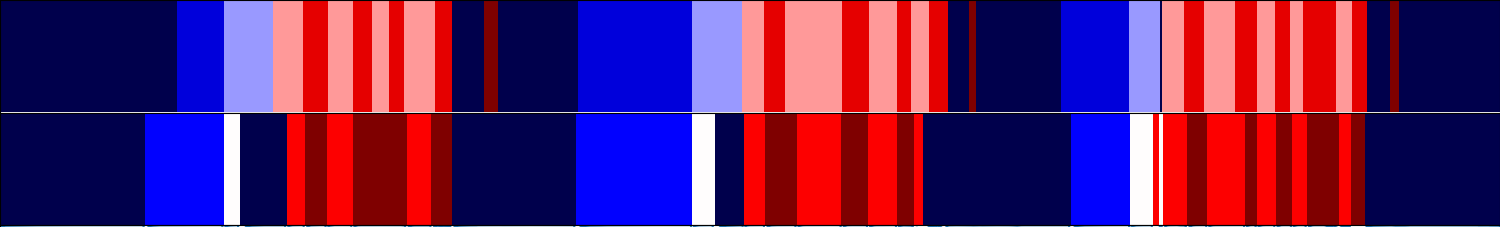

In [20]:
write_video('please_work2.mp4', images)

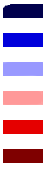

In [124]:
Image.open("results/gestures_legend.png")

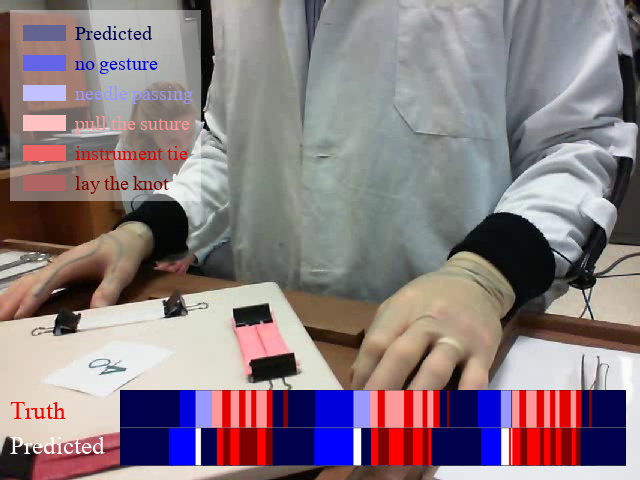

In [208]:
back_im

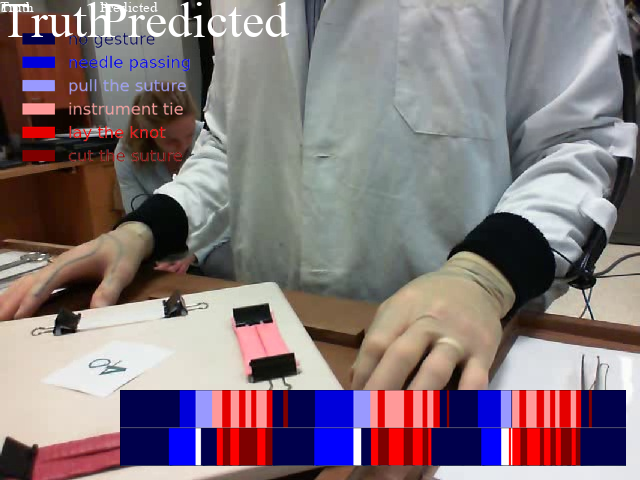

In [96]:
back_im

In [76]:
im3.size

(218, 172)

In [66]:
im2.size

(506, 76)

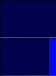

In [70]:
im2.crop((0, 0, 506 / 9, 76))

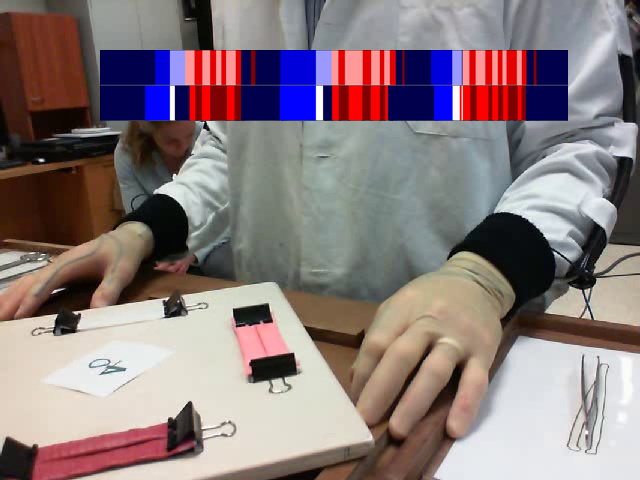

In [44]:
back_im

In [59]:
colors = [(0, 0, 76),
          (0, 0, 219),
          (153, 153, 255),
          (255, 153, 153),
          (229, 0, 0),
          (127, 0, 0)]

for i in range(len(colors)):
    x1, y1, z1 = colors[i]
    for j in range(i + 1, len(colors)):
        x2, y2, z2 = colors[j]
        print(np.linalg.norm((x1 - x2, y1 - y2, z1 - z2)))

143.0
280.81844668753513
307.18561164221217
241.2819926973416
148.00337833982033
219.34903692517094
304.6145104882563
316.8627463113958
253.16002844051033
144.2497833620557
306.93647551244214
298.51298129227143
217.93118179829153
251.40007955448223
102.0
